# Neural Network

## Lectura de datos

In [1]:
import pandas as pd
import nltk
import gensim
import sqlite3

sqlite_db = "../dataset/fake_news.sqlite"

conn = sqlite3.connect(sqlite_db)
df = pd.read_sql_query("SELECT * FROM NEWS", conn)
conn.close()

#### Total de palabras en el Dataset

In [2]:
list_of_words = []
unique_words = set()
for document in df_news.clean_joined:
    for word in gensim.utils.simple_preprocess(document):
        list_of_words.append(word)
        unique_words.add(word)
        
total_words = len(list_of_words)  # total words
unique_words = len(unique_words)   # total unique words
print("Total words:" + str(total_words) + " unique_words:" + str(unique_words))

Total words:8844981 unique_words:96148


## Partición del dataset

In [3]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df.clean_joined, df.isfake, test_size = 0.2)

In [4]:
from nltk import word_tokenize
from tensorflow.keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer(num_words = total_words)
tokenizer.fit_on_texts(x_train)
x_train_seq = tokenizer.texts_to_sequences(x_train)
x_test_seq = tokenizer.texts_to_sequences(x_test)

In [5]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

x_train_padded = pad_sequences(x_train_seq, maxlen = 40, padding = 'post', truncating = 'post')
x_test_padded = pad_sequences(x_test_seq, maxlen = 40, truncating = 'post') 

In [6]:
print(x_train_seq[0])

[17, 9, 25, 69, 2317, 174, 26, 34, 11, 17, 9, 25, 310, 379, 194, 9, 642, 174, 112, 440, 4256, 2317, 334, 2, 12, 1, 926, 2727, 1437, 174, 108, 130, 421, 26, 115, 532, 3177, 25, 421, 734, 17, 9, 25, 14853, 3319, 13618, 274, 192, 174, 44, 42, 402, 649, 9911, 374, 31, 44, 42, 61, 17, 9, 971, 72, 17, 9, 262, 906, 950, 496, 103, 26, 927, 115, 130, 421, 26, 3319, 13618, 198, 414, 1203, 1273, 26, 3194, 986, 84, 25, 1, 56, 257, 62, 5064, 1906, 2, 226, 6, 26, 414, 3319, 13618, 4375, 683, 84, 25, 74, 947, 750, 1, 116, 2797, 2170, 525, 1143, 1394, 26, 192, 569, 372, 7, 98, 332, 37, 5968, 96, 6, 278, 911, 262, 2317, 66, 1, 820, 283, 125, 703, 111, 1654, 57, 1104, 504, 108, 1437, 1, 283, 111, 29, 2284, 2599, 235, 9, 174, 746, 2317, 5138, 133, 172, 38, 3885, 135, 17, 9, 1961, 232, 2673, 17, 9, 9, 174, 112, 173, 2317, 510, 322, 92, 269, 586, 63, 14, 1, 711, 51, 278, 504]


In [7]:
print(x_train_padded[0])

[  17    9   25   69 2317  174   26   34   11   17    9   25  310  379
  194    9  642  174  112  440 4256 2317  334    2   12    1  926 2727
 1437  174  108  130  421   26  115  532 3177   25  421  734]


In [8]:
y_train = np.asarray(y_train).astype('float32').reshape((-1,1))

## Construcción del modelo

In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout, Embedding

In [10]:
modelo=Sequential()

In [11]:
modelo.add(Embedding(total_words,input_length=40, output_dim = 128))
modelo.add(Flatten())
modelo.add(Dense(units=64, activation='relu'))
# Adding dropout to prevent overfitting (regularización)
modelo.add(Dropout(0.2)) # 10% out in each epoc
modelo.add(Dense(units=32, activation='relu'))
# Adding dropout to prevent overfitting (regularización)
modelo.add(Dropout(0.2))
modelo.add(Dense(units=16, activation='relu'))
modelo.add(Dropout(0.2))
modelo.add(Dense(units=1, activation='sigmoid'))

In [12]:
modelo.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [13]:
modelo.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 40, 128)           1132157568
_________________________________________________________________
flatten (Flatten)            (None, 5120)              0         
_________________________________________________________________
dense (Dense)                (None, 64)                327744    
_________________________________________________________________
dropout (Dropout)            (None, 64)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 32)                2080      
_________________________________________________________________
dropout_1 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 16)                5

In [14]:
%time history = modelo.fit(x_train_padded, y_train, batch_size=2, epochs=2,validation_split = 0.2)

Epoch 1/2
14367/14367 [==============================] - 94174s 7s/step - loss: 0.0212 - accuracy: 0.9946 - val_loss: 0.0113 - val_accuracy: 0.9987
Epoch 2/2
14367/14367 [==============================] - 109724s 8s/step - loss: 0.0039 - accuracy: 0.9997 - val_loss: 0.0293 - val_accuracy: 0.9985
CPU times: user 11d 56min 39s, sys: 2d 6h 46min 14s, total: 13d 7h 42min 53s
Wall time: 2d 8h 38min 29s


## Evaluación

In [15]:
prediction = modelo.predict(x_test_padded)

In [16]:
prediction_list = []
for i in range(len(prediction)):
    if prediction[i].item() > 0.5:
        prediction_list.append(1)
    else:
        prediction_list.append(0)

In [17]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(list(y_test), prediction_list)

print("Model Accuracy : ", accuracy)

Model Accuracy :  0.9944320712694877


[Text(0, 0.5, 'Reales(0)'), Text(0, 1.5, 'Falsas(1)')]

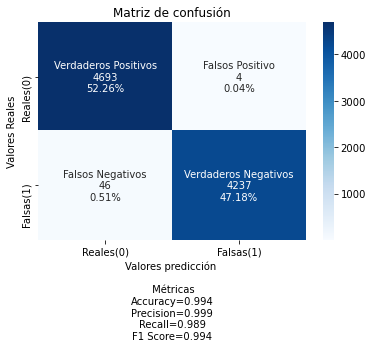

In [18]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

cm = confusion_matrix(list(y_test), prediction_list, labels=[0,1])

# group_names = ['True Neg','False Pos','False Neg','True Pos']
group_names = ['Verdaderos Positivos','Falsos Positivo','Falsos Negativos','Verdaderos Negativos']
group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cm.flatten()/np.sum(cm)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)

precision = cm[1,1] / sum(cm[:,1])
recall    = cm[1,1] / sum(cm[1,:])
f1_score  = 2*precision*recall / (precision + recall)
stats_text = "\nAccuracy={:0.3f}\nPrecision={:0.3f}\nRecall={:0.3f}\nF1 Score={:0.3f}".format(accuracy,precision,recall,f1_score)

ax= plt.subplot()
sns.heatmap(cm, annot=labels, fmt='', cmap='Blues', ax = ax); #annot=True to annotate cells

ax.set_xlabel('Predicted label' + stats_text)

# labels, title and ticks
ax.set_xlabel("Valores predicción \n\n Métricas" + stats_text)
ax.set_ylabel('Valores Reales')
ax.set_title('Matriz de confusión')
ax.xaxis.set_ticklabels(['Reales(0)', 'Falsas(1)'])
ax.yaxis.set_ticklabels(['Reales(0)', 'Falsas(1)'])